## Importing Required Libraries

In [38]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import zipfile
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

## Data Reading and Pre-Processing

In [2]:
df = pd.read_csv(r'C:\Users\amnak\Downloads\archive (4)\fraudTrain.csv')
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data1=pd.read_csv(r'C:\Users\amnak\Downloads\archive (4)\fraudTest.csv')
data1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Exploratory Analysis

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


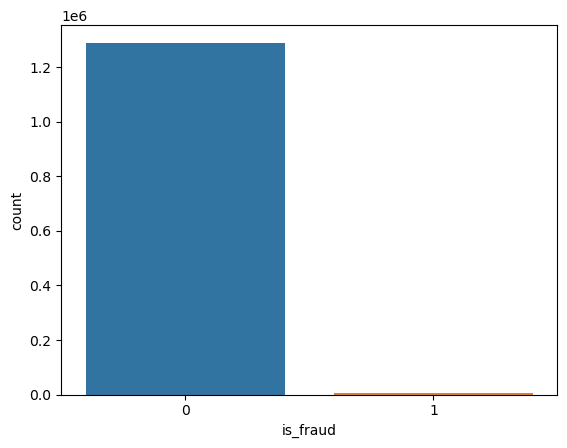

In [6]:
#distribution of the target variable
sns.countplot(x='is_fraud', data=df)
plt.show()


C:\Users\amnak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


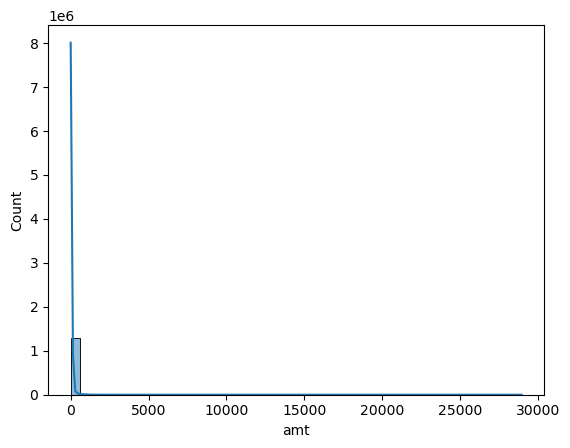

In [7]:
#distribution of transaction amount
sns.histplot(df['amt'], bins=50, kde=True)
plt.show()

In [17]:

columns_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 
    'city', 'state', 'zip', 'lat', 'long', 'dob', 'unix_time', 'merch_lat', 'merch_long',
    'trans_num' 
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

df = df.sample(n=100000, random_state=42)  

# categorical variables to dummy variables
categorical_cols = ['merchant', 'category', 'gender', 'job']
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns], drop_first=True)

print("\nDataFrame Head after get_dummies:")
print(df.head())

# Separate features and target variable
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X = X.astype(int)  

print("Data types of columns in X:")
print(X.dtypes)

# Convert to sparse matrices 
X_sparse = sparse.csr_matrix(X.values)
y_sparse = sparse.csr_matrix(y.values).transpose()

X_train, X_test, y_train, y_test = train_test_split(X_sparse, y_sparse, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


DataFrame Head after get_dummies:
           amt  city_pop  is_fraud  category_food_dining  \
405063   70.64       136         0                 False   
992874   14.23      2208         0                 False   
119194   15.86      3996         0                 False   
291183   31.97       695         0                 False   
723723  167.71      2872         0                 False   

        category_gas_transport  category_grocery_net  category_grocery_pos  \
405063                   False                 False                 False   
992874                   False                 False                 False   
119194                   False                 False                 False   
291183                   False                 False                 False   
723723                   False                 False                 False   

        category_health_fitness  category_home  category_kids_pets  ...  \
405063                     True          False              

## Logestic regression

In [23]:

lr_accuracy = accuracy_score(y_test.toarray().ravel(), y_pred_lr)
print("Logistic Regression:")
print(classification_report(y_test.toarray().ravel(), y_pred_lr))
print(f"Accuracy: {lr_accuracy * 100:.2f}%")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19881
           1       0.46      0.16      0.24       119

    accuracy                           0.99     20000
   macro avg       0.73      0.58      0.62     20000
weighted avg       0.99      0.99      0.99     20000

Accuracy: 99.39%


## Decision Tree

In [24]:

dt_accuracy = accuracy_score(y_test.toarray().ravel(), y_pred_dt)
print("\nDecision Tree:")
print(classification_report(y_test.toarray().ravel(), y_pred_dt))
print(f"Accuracy: {dt_accuracy * 100:.2f}%")



Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19881
           1       0.74      0.59      0.66       119

    accuracy                           1.00     20000
   macro avg       0.87      0.79      0.83     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 99.63%


## Random Forest

In [27]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.toarray().ravel())
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test.toarray().ravel(), y_pred_rf))
print("Accuracy:", accuracy_score(y_test.toarray().ravel(), y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19881
           1       0.91      0.42      0.57       119

    accuracy                           1.00     20000
   macro avg       0.95      0.71      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9963


## Visualizing the results

In [31]:
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test.toarray().ravel(), y_pred_lr))
print("Confusion Matrix - Decision Tree:")
print(confusion_matrix(y_test.toarray().ravel(), y_pred_dt))
print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test.toarray().ravel(), y_pred_rf))

Confusion Matrix - Logistic Regression:
[[19859    22]
 [  100    19]]
Confusion Matrix - Decision Tree:
[[19857    24]
 [   49    70]]
Confusion Matrix - Random Forest:
[[19876     5]
 [   69    50]]


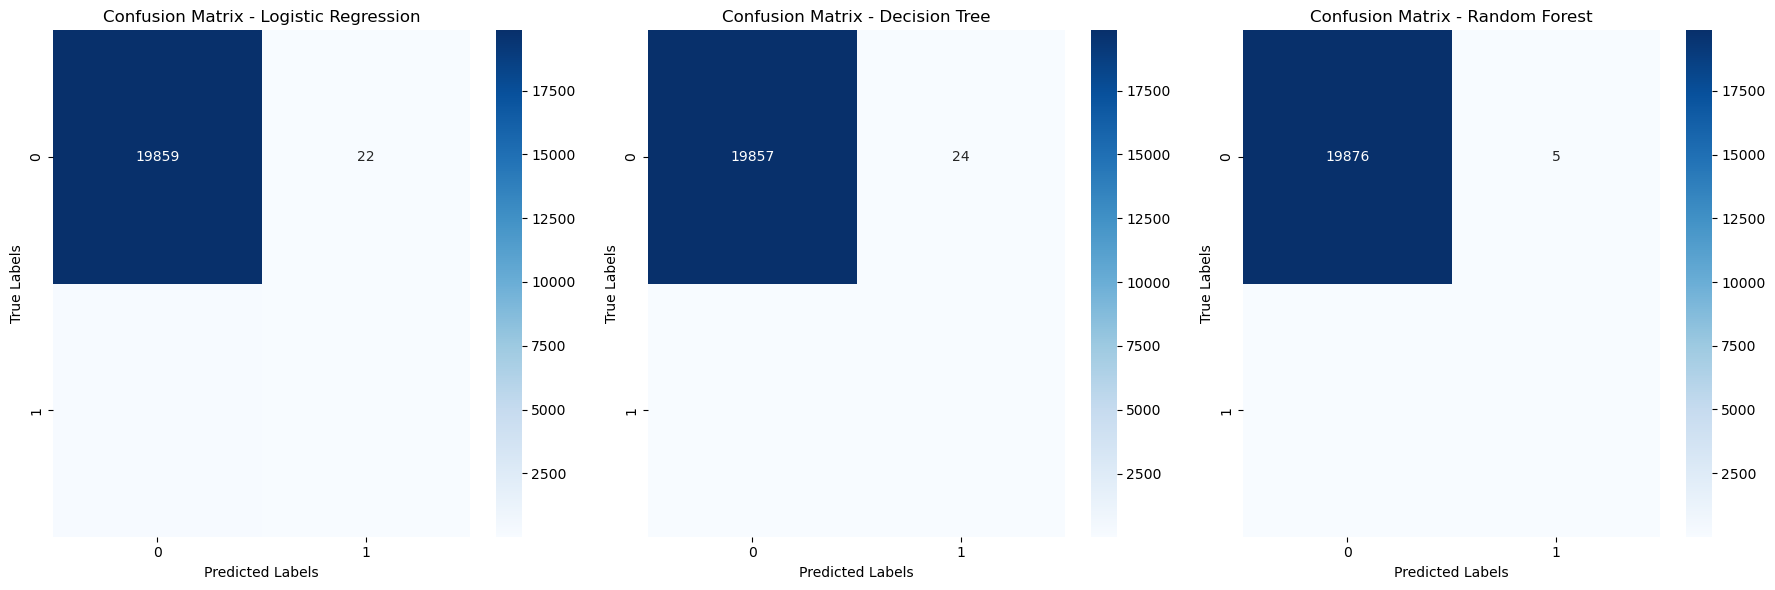

In [43]:

models = [
    ("Logistic Regression", lr_model, y_pred_lr),
    ("Decision Tree", dt_model, y_pred_dt),
    ("Random Forest", rf_model, y_pred_rf)
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model, y_pred) in enumerate(models):
    ax = axes[i]
    cm = confusion_matrix(y_test.toarray().ravel(), y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()


C:\Users\amnak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


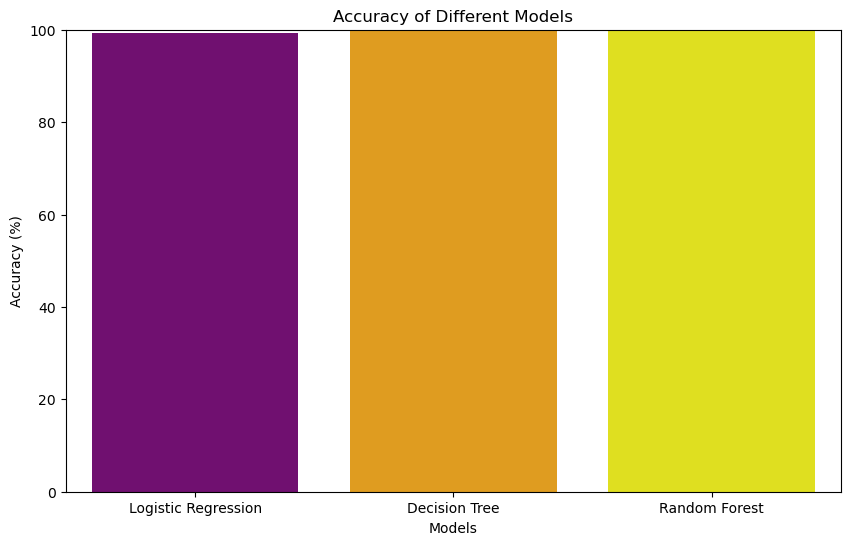

In [45]:
lr_accuracy = accuracy_score(y_test.toarray().ravel(), y_pred_lr)
dt_accuracy = accuracy_score(y_test.toarray().ravel(), y_pred_dt)
rf_accuracy = accuracy_score(y_test.toarray().ravel(), y_pred_rf)

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy]
colors = ['purple', 'orange', 'yellow'] 

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=[acc * 100 for acc in accuracies], palette=colors)
plt.ylim([0, 100]) 
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.show()


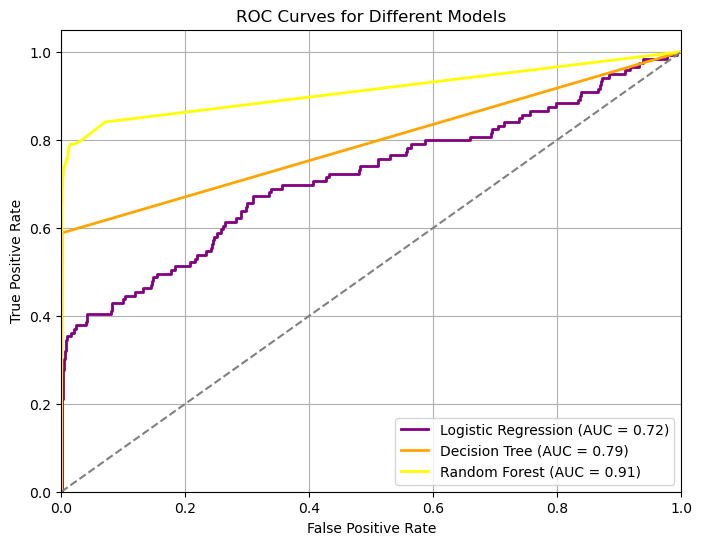

In [42]:

models = [
    ("Logistic Regression", lr_model, 'purple'),
    ("Decision Tree", dt_model, 'orange'),
    ("Random Forest", rf_model, 'yellow')
]

plt.figure(figsize=(8, 6))

for model_name, model, color in models:
    if model_name == "Logistic Regression":
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test.toarray().ravel(), y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
